### Library

In [1]:
import json
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### API KEY Setting

In [2]:
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
DATE = '20200115'
REQUEST_TYPE = '&data=AP01'

### API Requset

In [3]:
response = requests.get(HTTP + API_KEY + '&searchdate=' + DATE + REQUEST_TYPE)
data = json.loads(response.text)

### 환율코드 / 국가명 / 매매기준율

In [4]:
for cnt in data : 
    print(cnt['cur_unit'], cnt['cur_nm'], cnt['deal_bas_r'])

AED 아랍에미리트 디르함 313.93
AUD 호주 달러 795.81
BHD 바레인 디나르 3,058.54
BND 브루나이 달러 855.96
CAD 캐나다 달러 882.76
CHF 스위스 프랑 1,191.96
CNH 위안화 167.71
DKK 덴마아크 크로네 171.7
EUR 유로 1,283.11
GBP 영국 파운드 1,501.34
HKD 홍콩 달러 148.28
IDR(100) 인도네시아 루피아 8.44
JPY(100) 일본 옌 1,048.42
KRW 한국 원 1
KWD 쿠웨이트 디나르 3,800.47
MYR 말레이지아 링기트 283
NOK 노르웨이 크로네 129.91
NZD 뉴질랜드 달러 762.66
SAR 사우디 리얄 307.35
SEK 스웨덴 크로나 121.83
SGD 싱가포르 달러 855.96
THB 태국 바트 38.09
USD 미국 달러 1,153.1


### 현재일 환율

In [5]:
# date setting and request
DATE = '20200116'
response = requests.get(HTTP + API_KEY + '&searchdate=' + DATE + REQUEST_TYPE)
data = json.loads(response.text)

# result
RESULT = pd.DataFrame()
index = 0

for i in data : 
    RESULT = RESULT.append(pd.DataFrame({'국가명' : i['cur_nm'], '전신환(송금)받으실때' : i['ttb'],\
                                         '전신환(송금)보내실때' : i['tts'], '매매 기준율' : i['deal_bas_r'],\
                                         '장부가격' : i['bkpr'], '년환가료율' : i['yy_efee_r'],\
                                         '10일환가료율' : i['ten_dd_efee_r'],\
                                         '서울외국환중계매매기준율' : i['kftc_deal_bas_r'],\
                                         '서울외국환중계장부가격' : i['kftc_bkpr']}, index=[i['cur_unit']]))
RESULT

,국가명,전신환(송금)받으실때,전신환(송금)보내실때,매매 기준율,장부가격,년환가료율,10일환가료율,서울외국환중계매매기준율,서울외국환중계장부가격
AED,아랍에미리트 디르함,312.32,318.63,315.48,315,0,0,315.48,315
AUD,호주 달러,791.98,807.97,799.98,799,0,0,799.98,799
BHD,바레인 디나르,"3,042.92","3,104.39","3,073.66","3,073",0,0,"3,073.66","3,073"
BND,브루나이 달러,852.25,869.46,860.86,860,0,0,860.86,860
CAD,캐나다 달러,879.56,897.33,888.45,888,0,0,888.45,888
CHF,스위스 프랑,"1,190.29","1,214.34","1,202.32","1,202",0,0,"1,202.32","1,202"
CNH,위안화,166.32,169.68,168,168,0,0,168,168
DKK,덴마아크 크로네,171.18,174.63,172.91,172,0,0,172.91,172
EUR,유로,"1,279.31","1,305.16","1,292.24","1,292",0,0,"1,292.24","1,292"
GBP,영국 파운드,"1,496.24","1,526.47","1,511.36","1,511",0,0,"1,511.36","1,511"


### USD (미국 달러)

In [6]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'USD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'USD' : i['deal_bas_r']}, index=[date]))
            
# string to float
RESULT['USD'] = RESULT['USD'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_USD.csv')

2010-01-04 1161
2010-01-05 1147.3
2010-01-06 1141.4
2010-01-07 1132
2010-01-08 1134.1
2010-01-11 1121.3
2010-01-12 1123.3
2010-01-13 1127
2010-01-14 1123.1
2010-01-15 1122.2
2010-01-18 1128.4
2010-01-19 1123.4
2010-01-20 1128
2010-01-21 1137.9
2010-01-22 1148.7
2010-01-25 1148.7
2010-01-26 1143.3
2010-01-27 1160.5
2010-01-28 1161
2010-01-29 1159.1
2010-02-01 1160.5
2010-02-02 1158
2010-02-03 1151.6
2010-02-04 1153.3
2010-02-05 1171.5
2010-02-08 1172
2010-02-09 1168.5
2010-02-10 1156.3
2010-02-11 1157.1
2010-02-12 1156.5
2010-02-16 1153.6
2010-02-17 1143.5
2010-02-18 1145.5
2010-02-19 1156.1
2010-02-22 1151.9
2010-02-23 1148
2010-02-24 1157.4
2010-02-25 1156.5
2010-02-26 1159.8
2010-03-02 1153.4
2010-03-03 1146.3
2010-03-04 1143.8
2010-03-05 1142.3
2010-03-08 1134.2
2010-03-09 1134
2010-03-10 1133.9
2010-03-11 1127.7
2010-03-12 1132.2
2010-03-15 1133.5
2010-03-16 1135.1
2010-03-17 1130.7
2010-03-18 1130.7
2010-03-19 1133.4
2010-03-22 1136.3
2010-03-23 1134.6
2010-03-24 1135.4
2010-03-25

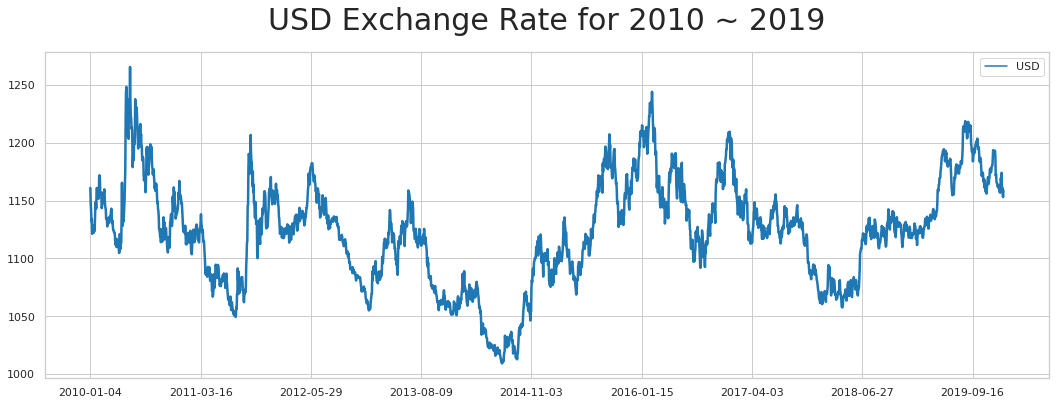

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
plt.figure(figsize = (18,6))
sns.set(style = 'whitegrid')
plot = sns.lineplot(data = RESULT, palette = 'tab10', linewidth=2.5)
plt.title('USD Exchange Rate for 2010 ~ 2019', fontsize = 30, position = (0.5, 1.0+0.05))
plot.set(xticks = RESULT.index[0::300])
plt.show()

### EUR (유로)

In [8]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'EUR' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'EUR' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['EUR'] = RESULT['EUR'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_EUR.csv')

2010-01-04 1673.46
2010-01-05 1665.97
2010-01-06 1643.96
2010-01-07 1639.52
2010-01-08 1621.38
2010-01-11 1633.47
2010-01-12 1625.56
2010-01-13 1628.85
2010-01-14 1634.41
2010-01-15 1627.16
2010-01-18 1612.58
2010-01-19 1623.75
2010-01-20 1605.39
2010-01-21 1597.34
2010-01-22 1602.27
2010-01-25 1628.14
2010-01-26 1625.8
2010-01-27 1619.91
2010-01-28 1626.81
2010-01-29 1614.59
2010-02-01 1605.43
2010-02-02 1626.98
2010-02-03 1620.2
2010-02-04 1600.58
2010-02-05 1583.54
2010-02-08 1599.94
2010-02-09 1601.24
2010-02-10 1609.09
2010-02-11 1591.19
2010-02-12 1584.01
2010-02-16 1570.32
2010-02-17 1586.74
2010-02-18 1554.47
2010-02-19 1546.66
2010-02-22 1575.07
2010-02-23 1563.22
2010-02-24 1552.37
2010-02-25 1565.76
2010-02-26 1569.23
2010-03-02 1574.04
2010-03-03 1569.06
2010-03-04 1571.53
2010-03-05 1552.77
2010-03-08 1558.12
2010-03-09 1544.38
2010-03-10 1543.54
2010-03-11 1546.42
2010-03-12 1547.89
2010-03-15 1556.79
2010-03-16 1550.89
2010-03-17 1560.54
2010-03-18 1551.26
2010-03-19 153

### JPY (일본 옌)

In [9]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'JPY(100)' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'JPY(100)' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['JPY(100)'] = RESULT['JPY(100)'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_JPY(100).csv')

2010-01-04 1256.5
2010-01-05 1250.96
2010-01-06 1248.35
2010-01-07 1232.35
2010-01-08 1211.91
2010-01-11 1223.96
2010-01-12 1216.58
2010-01-13 1234.23
2010-01-14 1232.05
2010-01-15 1230.24
2010-01-18 1236.8
2010-01-19 1243.13
2010-01-20 1234.21
2010-01-21 1240.88
2010-01-22 1261.78
2010-01-25 1277.6
2010-01-26 1272.75
2010-01-27 1284.75
2010-01-28 1289.08
2010-01-29 1287
2010-02-01 1284.13
2010-02-02 1287.26
2010-02-03 1283.3
2010-02-04 1267.2
2010-02-05 1291.85
2010-02-08 1312.49
2010-02-09 1313.91
2010-02-10 1299.4
2010-02-11 1287.13
2010-02-12 1289.46
2010-02-16 1282.72
2010-02-17 1277.38
2010-02-18 1252.96
2010-02-19 1246.47
2010-02-22 1262.94
2010-02-23 1259.85
2010-02-24 1272.93
2010-02-25 1282.06
2010-02-26 1299.31
2010-03-02 1301.18
2010-03-03 1298.38
2010-03-04 1295.67
2010-03-05 1283.08
2010-03-08 1262.05
2010-03-09 1255.97
2010-03-10 1261.54
2010-03-11 1250.77
2010-03-12 1247.45
2010-03-15 1248.11
2010-03-16 1253.48
2010-03-17 1254.72
2010-03-18 1249.72
2010-03-19 1251.16
20

### AED (아랍에미리트 디르함)

In [10]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'AED' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'AED' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['AED'] = RESULT['AED'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_AED.csv')

2010-01-04 317.89
2010-01-05 314.76
2010-01-06 311.54
2010-01-07 309.88
2010-01-08 308.5
2010-01-11 308.45
2010-01-12 304.87
2010-01-13 306.09
2010-01-14 306.67
2010-01-15 305.49
2010-01-18 305.79
2010-01-19 306.8
2010-01-20 306.1
2010-01-21 308.25
2010-01-22 309.96
2010-01-25 313.59
2010-01-26 312.84
2010-01-27 313.42
2010-01-28 315.81
2010-01-29 314.84
2010-02-01 315.24
2010-02-02 317.94
2010-02-03 315.84
2010-02-04 313.69
2010-02-05 313.99
2010-02-08 318.8
2010-02-09 319.24
2010-02-10 317.62
2010-02-11 315.24
2010-02-12 315.04
2010-02-16 314.43
2010-02-17 314.31
2010-02-18 311.11
2010-02-19 312.41
2010-02-22 315.2
2010-02-23 312.9
2010-02-24 312.68
2010-02-25 314.75
2010-02-26 315.38
2010-03-02 315.87
2010-03-03 313.83
2010-03-04 312.17
2010-03-05 311.42
2010-03-08 310.9
2010-03-09 308.65
2010-03-10 308.88
2010-03-11 308.41
2010-03-12 307.95
2010-03-15 307.93
2010-03-16 308.71
2010-03-17 308.7
2010-03-18 307.55
2010-03-19 308.03
2010-03-22 308.42
2010-03-23 309.44
2010-03-24 308.82


### AUD (호주 달러)

In [11]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'AUD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'AUD' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['AUD'] = RESULT['AUD'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_AUD.csv')

2010-01-04 1050.37
2010-01-05 1054.51
2010-01-06 1043.72
2010-01-07 1046.4
2010-01-08 1039.54
2010-01-11 1051.73
2010-01-12 1040.8
2010-01-13 1035.44
2010-01-14 1040.57
2010-01-15 1044.96
2010-01-18 1034.58
2010-01-19 1043.96
2010-01-20 1036.38
2010-01-21 1031.41
2010-01-22 1025.73
2010-01-25 1038.37
2010-01-26 1039.02
2010-01-27 1035.1
2010-01-28 1039.98
2010-01-29 1032.35
2010-02-01 1022.66
2010-02-02 1041.91
2010-02-03 1028.02
2010-02-04 1014.63
2010-02-05 1000.72
2010-02-08 1016.37
2010-02-09 1012.36
2010-02-10 1024.68
2010-02-11 1013.74
2010-02-12 1030.22
2010-02-16 1026.48
2010-02-17 1039.11
2010-02-18 1026.72
2010-02-19 1022.37
2010-02-22 1041.27
2010-02-23 1034.43
2010-02-24 1024.4
2010-02-25 1032.69
2010-02-26 1028.72
2010-03-02 1045.46
2010-03-03 1041.98
2010-03-04 1038.3
2010-03-05 1028.39
2010-03-08 1039.3
2010-03-09 1029.57
2010-03-10 1038.75
2010-03-11 1037.1
2010-03-12 1035.77
2010-03-15 1037.61
2010-03-16 1035.36
2010-03-17 1041.98
2010-03-18 1042.87
2010-03-19 1041.25


### BHD (바레인 디나르)

In [12]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'BHD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'BHD' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['BHD'] = RESULT['BHD'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_BHD.csv')

2010-01-04 3097.08
2010-01-05 3066.76
2010-01-06 3035.36
2010-01-07 3019.02
2010-01-08 3005.92
2010-01-11 3005.04
2010-01-12 2970.21
2010-01-13 2982.04
2010-01-14 2987.8
2010-01-15 2976.39
2010-01-18 2979.31
2010-01-19 2989.05
2010-01-20 2982.23
2010-01-21 3003.53
2010-01-22 3019.89
2010-01-25 3050.66
2010-01-26 3048.01
2010-01-27 3053.66
2010-01-28 3075.33
2010-01-29 3067.72
2010-02-01 3071.27
2010-02-02 3097.53
2010-02-03 3077.11
2010-02-04 3056.15
2010-02-05 3059.15
2010-02-08 3106.1
2010-02-09 3110.26
2010-02-10 3094.35
2010-02-11 3071.19
2010-02-12 3069.23
2010-02-16 3063.23
2010-02-17 3058.09
2010-02-18 3031.11
2010-02-19 3043.93
2010-02-22 3071.09
2010-02-23 3048.54
2010-02-24 3046.5
2010-02-25 3066.66
2010-02-26 3072.76
2010-03-02 3077.54
2010-03-03 3057.56
2010-03-04 3041.46
2010-03-05 3033.95
2010-03-08 3028.91
2010-03-09 3007.08
2010-03-10 3009.36
2010-03-11 3004.59
2010-03-12 3000.08
2010-03-15 3000.27
2010-03-16 3007.69
2010-03-17 3006.92
2010-03-18 2995.78
2010-03-19 3000

### BND (브루나이 달러)

In [13]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'BND' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'BND' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['BND'] = RESULT['BND'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_BND.csv')

2019-12-13 878.65
2019-12-16 864.76
2019-12-17 865.45
2019-12-18 860.75
2019-12-19 859.78
2019-12-20 859.47
2019-12-23 857.79
2019-12-24 857.79
2019-12-26 858.88
2019-12-27 857.64
2019-12-30 858.37
2019-12-31 858.55
2020-01-02 860.88
2020-01-03 858.65
2020-01-06 860.91
2020-01-07 867.01
2020-01-08 862.83
2020-01-09 869.12
2020-01-10 858.46
2020-01-13 861.16
2020-01-14 858.3
2020-01-15 855.96
2020-01-16 860.86


### CAD (캐나다 달러)

In [14]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'CAD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'CAD' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['CAD'] = RESULT['CAD'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_CAD.csv')

2010-01-04 1110.15
2010-01-05 1109.76
2010-01-06 1101.19
2010-01-07 1102.69
2010-01-08 1095.51
2010-01-11 1099.37
2010-01-12 1083.4
2010-01-13 1081.9
2010-01-14 1092.96
2010-01-15 1096.28
2010-01-18 1090.75
2010-01-19 1098.66
2010-01-20 1090.07
2010-01-21 1082.66
2010-01-22 1082.33
2010-01-25 1088.75
2010-01-26 1086.98
2010-01-27 1083.13
2010-01-28 1090.12
2010-01-29 1084.13
2010-02-01 1082.81
2010-02-02 1100.92
2010-02-03 1096.87
2010-02-04 1084.63
2010-02-05 1075.29
2010-02-08 1094.39
2010-02-09 1089.98
2010-02-10 1093.04
2010-02-11 1089.89
2010-02-12 1102
2010-02-16 1100.53
2010-02-17 1104.15
2010-02-18 1092.19
2010-02-19 1091.35
2010-02-22 1113.97
2010-02-23 1102.39
2010-02-24 1088.01
2010-02-25 1097.34
2010-02-26 1092.42
2010-03-02 1114.29
2010-03-03 1112.75
2010-03-04 1111.69
2010-03-05 1109.62
2010-03-08 1111.77
2010-03-09 1102.66
2010-03-10 1105.43
2010-03-11 1105.45
2010-03-12 1104.76
2010-03-15 1111.76
2010-03-16 1112.43
2010-03-17 1118.16
2010-03-18 1117.71
2010-03-19 1116.2

### CHF (스위스 프랑)

In [15]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'CHF' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'CHF' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['CHF'] = RESULT['CHF'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_CHF.csv')

2010-01-04 1128.17
2010-01-05 1122.31
2010-01-06 1106.67
2010-01-07 1107.41
2010-01-08 1095.46
2010-01-11 1106.62
2010-01-12 1102.44
2010-01-13 1103.78
2010-01-14 1106.1
2010-01-15 1101.5
2010-01-18 1093.14
2010-01-19 1100.92
2010-01-20 1088.38
2010-01-21 1084.37
2010-01-22 1090.99
2010-01-25 1105.07
2010-01-26 1105.06
2010-01-27 1099.94
2010-01-28 1104.93
2010-01-29 1098.6
2010-02-01 1090.87
2010-02-02 1105.61
2010-02-03 1099.57
2010-02-04 1088.32
2010-02-05 1081.18
2010-02-08 1089.2
2010-02-09 1093.03
2010-02-10 1096.33
2010-02-11 1085.5
2010-02-12 1080.69
2010-02-16 1071.63
2010-02-17 1081.06
2010-02-18 1059.53
2010-02-19 1055.75
2010-02-22 1075.07
2010-02-23 1068.17
2010-02-24 1060.28
2010-02-25 1069.62
2010-02-26 1072.39
2010-03-02 1075.55
2010-03-03 1072.08
2010-03-04 1073.9
2010-03-05 1061.58
2010-03-08 1064.76
2010-03-09 1055.49
2010-03-10 1055.64
2010-03-11 1058.35
2010-03-12 1058.94
2010-03-15 1068.18
2010-03-16 1067.7
2010-03-17 1074.19
2010-03-18 1070.82
2010-03-19 1069.94


### CNH : 위안화

In [16]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'CNH' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'CNH' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['CNH'] = RESULT['CNH'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_CNH.csv')

2016-01-04 177.84
2016-01-05 179.19
2016-01-06 178.97
2016-01-07 179.05
2016-01-08 179.04
2016-01-11 179.13
2016-01-12 180.91
2016-01-13 183.05
2016-01-14 183.52
2016-01-15 183.84
2016-01-18 183.09
2016-01-19 184.24
2016-01-20 183.43
2016-01-21 183.57
2016-01-22 183.09
2016-01-25 182.23
2016-01-26 180.77
2016-01-27 181.6
2016-01-28 181.6
2016-01-29 182.78
2016-02-01 182.44
2016-02-02 182.57
2016-02-03 181.86
2016-02-04 183.37
2016-02-05 181.83
2016-02-11 181.73
2016-02-12 182.78
2016-02-15 184.5
2016-02-16 185.85
2016-02-17 186.89
2016-02-18 187.56
2016-02-19 187.87
2016-02-22 189.23
2016-02-23 189.01
2016-02-24 188.31
2016-02-25 188.92
2016-02-26 189.08
2016-02-29 189
2016-03-02 189.53
2016-03-03 188.31
2016-03-04 186.27
2016-03-07 185.41
2016-03-08 184.6
2016-03-09 185.17
2016-03-10 186.36
2016-03-11 185.39
2016-03-14 184.88
2016-03-15 182.88
2016-03-16 182.98
2016-03-17 183.04
2016-03-18 180.83
2016-03-21 179.76
2016-03-22 179.95
2016-03-23 178.84
2016-03-24 178.27
2016-03-25 179.19

### DKK (덴마아크 크로네)

In [23]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'DKK' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'DKK' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['DKK'] = RESULT['DKK'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_DKK.csv')

2010-01-04 224.87
2010-01-05 223.88
2010-01-06 220.92
2010-01-07 220.34
2010-01-08 217.91
2010-01-11 219.52
2010-01-12 218.47
2010-01-13 218.92
2010-01-14 219.64
2010-01-15 218.68
2010-01-18 216.69
2010-01-19 218.18
2010-01-20 215.73
2010-01-21 214.62
2010-01-22 215.28
2010-01-25 218.68
2010-01-26 218.39
2010-01-27 217.55
2010-01-28 218.51
2010-01-29 216.88
2010-02-01 215.64
2010-02-02 218.52
2010-02-03 217.62
2010-02-04 215.01
2010-02-05 212.72
2010-02-08 214.88
2010-02-09 215.1
2010-02-10 216.11
2010-02-11 213.72
2010-02-12 212.76
2010-02-16 210.97
2010-02-17 213.18
2010-02-18 208.84
2010-02-19 207.8
2010-02-22 211.63
2010-02-23 210.02
2010-02-24 208.58
2010-02-25 210.33
2010-02-26 210.85
2010-03-02 211.48
2010-03-03 210.82
2010-03-04 211.15
2010-03-05 208.64
2010-03-08 209.37
2010-03-09 207.53
2010-03-10 207.44
2010-03-11 207.82
2010-03-12 208.02
2010-03-15 209.21
2010-03-16 208.42
2010-03-17 209.73
2010-03-18 208.48
2010-03-19 206.96
2010-03-22 205.84
2010-03-23 207.15
2010-03-24 2

### GBP (영국 파운드)

In [24]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'GBP' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'GBP' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['GBP'] = RESULT['GBP'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_GBP.csv')

2010-01-04 1883.46
2010-01-05 1860.44
2010-01-06 1829.39
2010-01-07 1822.54
2010-01-08 1804.73
2010-01-11 1820.29
2010-01-12 1804.61
2010-01-13 1817.1
2010-01-14 1833.78
2010-01-15 1833.85
2010-01-18 1827.73
2010-01-19 1843.16
2010-01-20 1839.64
2010-01-21 1845.03
2010-01-22 1842.15
2010-01-25 1853.44
2010-01-26 1866.89
2010-01-27 1857.58
2010-01-28 1875.1
2010-01-29 1864.91
2010-02-01 1845.46
2010-02-02 1864.22
2010-02-03 1853.43
2010-02-04 1833.73
2010-02-05 1818.24
2010-02-08 1827.17
2010-02-09 1828.44
2010-02-10 1832.26
2010-02-11 1806.09
2010-02-12 1815.84
2010-02-16 1808.69
2010-02-17 1819.8
2010-02-18 1792.21
2010-02-19 1774.95
2010-02-22 1787.01
2010-02-23 1779.35
2010-02-24 1773.17
2010-02-25 1781.67
2010-02-26 1768.3
2010-03-02 1739.6
2010-03-03 1725.13
2010-03-04 1732.11
2010-03-05 1719.13
2010-03-08 1731.92
2010-03-09 1705.54
2010-03-10 1702.6
2010-03-11 1696.5
2010-03-12 1706.23
2010-03-15 1717.01
2010-03-16 1706.52
2010-03-17 1727.48
2010-03-18 1730.39
2010-03-19 1725.06


### HKD	(홍콩 달러)

In [25]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'HKD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'HKD' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['HKD'] = RESULT['HKD'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_HKD.csv')

2010-01-04 150.58
2010-01-05 149.08
2010-01-06 147.53
2010-01-07 146.79
2010-01-08 146.11
2010-01-11 146.07
2010-01-12 144.39
2010-01-13 144.96
2010-01-14 145.23
2010-01-15 144.65
2010-01-18 144.74
2010-01-19 145.16
2010-01-20 144.82
2010-01-21 145.76
2010-01-22 146.51
2010-01-25 147.97
2010-01-26 147.92
2010-01-27 148.06
2010-01-28 149.09
2010-01-29 148.87
2010-02-01 149.11
2010-02-02 150.33
2010-02-03 149.38
2010-02-04 148.35
2010-02-05 148.42
2010-02-08 150.7
2010-02-09 150.9
2010-02-10 150.14
2010-02-11 149.03
2010-02-12 148.93
2010-02-16 148.59
2010-02-17 148.38
2010-02-18 147.12
2010-02-19 147.75
2010-02-22 149.07
2010-02-23 148.06
2010-02-24 147.96
2010-02-25 148.89
2010-02-26 149.2
2010-03-02 149.44
2010-03-03 148.49
2010-03-04 147.71
2010-03-05 147.34
2010-03-08 147.1
2010-03-09 146.11
2010-03-10 146.21
2010-03-11 145.99
2010-03-12 145.76
2010-03-15 145.8
2010-03-16 146.14
2010-03-17 146.09
2010-03-18 145.53
2010-03-19 145.78
2010-03-22 145.99
2010-03-23 146.43
2010-03-24 146.

### IDR (인도네시아 루피아)

In [26]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'IDR(100)' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'IDR(100)' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['IDR(100)'] = RESULT['IDR(100)'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_IDR(100).csv')

2010-01-04 12.39
2010-01-05 12.37
2010-01-06 12.28
2010-01-07 12.31
2010-01-08 12.26
2010-01-11 12.29
2010-01-12 12.23
2010-01-13 12.25
2010-01-14 12.28
2010-01-15 12.24
2010-01-18 12.22
2010-01-19 12.22
2010-01-20 12.18
2010-01-21 12.18
2010-01-22 12.26
2010-01-25 12.35
2010-01-26 12.33
2010-01-27 12.27
2010-01-28 12.33
2010-01-29 12.4
2010-02-01 12.38
2010-02-02 12.44
2010-02-03 12.39
2010-02-04 12.4
2010-02-05 12.37
2010-02-08 12.48
2010-02-09 12.48
2010-02-10 12.44
2010-02-11 12.37
2010-02-12 12.35
2010-02-16 12.35
2010-02-17 12.38
2010-02-18 12.33
2010-02-19 12.35
2010-02-22 12.4
2010-02-23 12.37
2010-02-24 12.36
2010-02-25 12.42
2010-02-26 12.41
2010-03-02 12.53
2010-03-03 12.41
2010-03-04 12.36
2010-03-05 12.35
2010-03-08 12.36
2010-03-09 12.36
2010-03-10 12.34
2010-03-11 12.35
2010-03-12 12.31
2010-03-15 12.36
2010-03-16 12.37
2010-03-17 12.37
2010-03-18 12.4
2010-03-19 12.4
2010-03-22 12.35
2010-03-23 12.46
2010-03-24 12.44
2010-03-25 12.44
2010-03-26 12.5
2010-03-29 12.52
201

### KWD	(쿠웨이트 디나르)

In [27]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'KWD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'KWD' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['KWD'] = RESULT['KWD'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_KWD.csv')

2010-01-04 4074.68
2010-01-05 4031.1
2010-01-06 3987.8
2010-01-07 3967.24
2010-01-08 3953.94
2010-01-11 3949.86
2010-01-12 3911.28
2010-01-13 3925.96
2010-01-14 3934.33
2010-01-15 3922.19
2010-01-18 3926.59
2010-01-19 3936.22
2010-01-20 3921.52
2010-01-21 3944.06
2010-01-22 3966.9
2010-01-25 4005.92
2010-01-26 4001.04
2010-01-27 4012.97
2010-01-28 4038.31
2010-01-29 4026.81
2010-02-01 4026.08
2010-02-02 4060.92
2010-02-03 4029.38
2010-02-04 4004.73
2010-02-05 3995.91
2010-02-08 4058.22
2010-02-09 4066.16
2010-02-10 4050.69
2010-02-11 4017.14
2010-02-12 4013.53
2010-02-16 4003.12
2010-02-17 4001.74
2010-02-18 3959.6
2010-02-19 3955.67
2010-02-22 3998.62
2010-02-23 3968.58
2010-02-24 3963.08
2010-02-25 4000.35
2010-02-26 4014.97
2010-03-02 4017.45
2010-03-03 3994.66
2010-03-04 3964.73
2010-03-05 3966.02
2010-03-08 3956.69
2010-03-09 3931
2010-03-10 3932.14
2010-03-11 3925.63
2010-03-12 3922.32
2010-03-15 3933.58
2010-03-16 3934.97
2010-03-17 3938.1
2010-03-18 3923.24
2010-03-19 3922.68
2

### MYR (말레이지아 링기트)

In [28]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'MYR' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'MYR' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['MYR'] = RESULT['MYR'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_MYR.csv')

2010-01-04 341
2010-01-05 340.31
2010-01-06 337.58
2010-01-07 337.49
2010-01-08 335.69
2010-01-11 335.43
2010-01-12 336.02
2010-01-13 336.16
2010-01-14 337.12
2010-01-15 336.01
2010-01-18 336.34
2010-01-19 337.24
2010-01-20 335.99
2010-01-21 336.54
2010-01-22 337.86
2010-01-25 338.46
2010-01-26 337.85
2010-01-27 336.88
2010-01-28 338.34
2010-01-29 338.78
2010-02-01 339.09
2010-02-02 340.86
2010-02-03 338.96
2010-02-04 338.93
2010-02-05 336.88
2010-02-08 340.01
2010-02-09 340.35
2010-02-10 340.69
2010-02-11 337.38
2010-02-12 338.23
2010-02-16 337.16
2010-02-17 337.5
2010-02-18 337.3
2010-02-19 337.33
2010-02-22 340.18
2010-02-23 337.91
2010-02-24 337.17
2010-02-25 340.05
2010-02-26 340.43
2010-03-02 342.72
2010-03-03 341.21
2010-03-04 340.62
2010-03-05 340.54
2010-03-08 339.8
2010-03-09 339.97
2010-03-10 339.52
2010-03-11 341.07
2010-03-12 340.82
2010-03-15 341.98
2010-03-16 341.48
2010-03-17 342.2
2010-03-18 343.1
2010-03-19 342.04
2010-03-22 342.68
2010-03-23 342.06
2010-03-24 341.71


### NOK	(노르웨이 크로네)

In [29]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'NOK' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'NOK' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['NOK'] = RESULT['NOK'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_NOK.csv')

2010-01-04 201.81
2010-01-05 202.4
2010-01-06 200.11
2010-01-07 200.9
2010-01-08 198.36
2010-01-11 200.05
2010-01-12 199.63
2010-01-13 198.39
2010-01-14 199.41
2010-01-15 199.23
2010-01-18 197.43
2010-01-19 199.62
2010-01-20 197.57
2010-01-21 195.89
2010-01-22 195.38
2010-01-25 198.51
2010-01-26 197.65
2010-01-27 196.77
2010-01-28 198.15
2010-01-29 196.12
2010-02-01 195.61
2010-02-02 199.32
2010-02-03 198.76
2010-02-04 196.16
2010-02-05 193.26
2010-02-08 195.49
2010-02-09 195.96
2010-02-10 197.74
2010-02-11 195.93
2010-02-12 196.5
2010-02-16 195.09
2010-02-17 197.01
2010-02-18 194.15
2010-02-19 191.3
2010-02-22 194.69
2010-02-23 194.55
2010-02-24 193.04
2010-02-25 195.02
2010-02-26 195.06
2010-03-02 195.35
2010-03-03 194.3
2010-03-04 195.04
2010-03-05 192.88
2010-03-08 193.76
2010-03-09 192.19
2010-03-10 192.17
2010-03-11 192.83
2010-03-12 192.9
2010-03-15 194.15
2010-03-16 193.25
2010-03-17 194.68
2010-03-18 193.94
2010-03-19 192.74
2010-03-22 191.48
2010-03-23 191.67
2010-03-24 190.6

### NZD	(뉴질랜드 달러)

In [30]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'NZD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'NZD' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['NZD'] = RESULT['NZD'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_NZD.csv')

2010-01-04 846.8
2010-01-05 848.54
2010-01-06 839.74
2010-01-07 839.42
2010-01-08 829.5
2010-01-11 837.33
2010-01-12 830.39
2010-01-13 831.06
2010-01-14 833.09
2010-01-15 832.93
2010-01-18 825.61
2010-01-19 833.34
2010-01-20 824.11
2010-01-21 817.63
2010-01-22 809.99
2010-01-25 819.79
2010-01-26 820.51
2010-01-27 813.9
2010-01-28 818.77
2010-01-29 813.31
2010-02-01 813.25
2010-02-02 828.79
2010-02-03 826.57
2010-02-04 804.01
2010-02-05 793.53
2010-02-08 806.94
2010-02-09 801.12
2010-02-10 811.84
2010-02-11 803.06
2010-02-12 807.31
2010-02-16 804.73
2010-02-17 814.41
2010-02-18 802.63
2010-02-19 799
2010-02-22 810.11
2010-02-23 806.12
2010-02-24 796.14
2010-02-25 801.52
2010-02-26 800.74
2010-03-02 811.79
2010-03-03 802.28
2010-03-04 796.2
2010-03-05 784.07
2010-03-08 799.44
2010-03-09 793.36
2010-03-10 797.89
2010-03-11 795.04
2010-03-12 791.25
2010-03-15 795.28
2010-03-16 795.32
2010-03-17 807.82
2010-03-18 806.01
2010-03-19 808.6
2010-03-22 800.17
2010-03-23 804.19
2010-03-24 799.91


### SAR (사우디 리얄)

In [31]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'SAR' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'SAR' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['SAR'] = RESULT['SAR'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_SAR.csv')

2010-01-04 311.3
2010-01-05 308.26
2010-01-06 305.13
2010-01-07 303.5
2010-01-08 302.17
2010-01-11 302.09
2010-01-12 298.59
2010-01-13 299.77
2010-01-14 300.35
2010-01-15 299.22
2010-01-18 299.58
2010-01-19 300.5
2010-01-20 299.79
2010-01-21 301.93
2010-01-22 303.6
2010-01-25 307.33
2010-01-26 306.41
2010-01-27 306.97
2010-01-28 309.34
2010-01-29 308.38
2010-02-01 308.75
2010-02-02 311.39
2010-02-03 309.34
2010-02-04 307.25
2010-02-05 307.54
2010-02-08 312.29
2010-02-09 312.67
2010-02-10 311.07
2010-02-11 308.8
2010-02-12 308.56
2010-02-16 307.97
2010-02-17 307.42
2010-02-18 304.74
2010-02-19 306
2010-02-22 308.77
2010-02-23 306.48
2010-02-24 306.25
2010-02-25 308.27
2010-02-26 308.89
2010-03-02 309.38
2010-03-03 307.38
2010-03-04 305.76
2010-03-05 305.01
2010-03-08 304.51
2010-03-09 302.31
2010-03-10 302.53
2010-03-11 302.04
2010-03-12 301.59
2010-03-15 301.61
2010-03-16 302.37
2010-03-17 302.3
2010-03-18 301.19
2010-03-19 301.67
2010-03-22 302.11
2010-03-23 303.05
2010-03-24 302.47
2

### SEK	(스웨덴 크로나)

In [32]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'SEK' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'SEK' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['SEK'] = RESULT['SEK'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_SEK.csv')

2010-01-04 163.53
2010-01-05 163.85
2010-01-06 161.08
2010-01-07 160.89
2010-01-08 158.94
2010-01-11 159.99
2010-01-12 159.12
2010-01-13 159.27
2010-01-14 160.33
2010-01-15 160.1
2010-01-18 158.85
2010-01-19 160.72
2010-01-20 159.17
2010-01-21 157.17
2010-01-22 157.08
2010-01-25 159.35
2010-01-26 158.73
2010-01-27 158.22
2010-01-28 159
2010-01-29 157.25
2010-02-01 156.67
2010-02-02 160.9
2010-02-03 160.52
2010-02-04 158.55
2010-02-05 155.17
2010-02-08 157.22
2010-02-09 157.57
2010-02-10 159.44
2010-02-11 158.65
2010-02-12 159.95
2010-02-16 159.37
2010-02-17 160.4
2010-02-18 158.41
2010-02-19 157.72
2010-02-22 160.31
2010-02-23 159.77
2010-02-24 158.08
2010-02-25 160.3
2010-02-26 161.16
2010-03-02 161.7
2010-03-03 160.58
2010-03-04 160.56
2010-03-05 159.73
2010-03-08 160.73
2010-03-09 159.37
2010-03-10 158.97
2010-03-11 158.86
2010-03-12 158.98
2010-03-15 160.44
2010-03-16 159.54
2010-03-17 160.41
2010-03-18 159.57
2010-03-19 158.75
2010-03-22 157.72
2010-03-23 158.02
2010-03-24 157.45


### SGD	(싱가포르 달러)

In [33]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'SGD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'SGD' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['SGD'] = RESULT['SGD'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_SGD.csv')

2010-01-04 831.86
2010-01-05 826.71
2010-01-06 819
2010-01-07 815.97
2010-01-08 810.64
2010-01-11 813.72
2010-01-12 806.95
2010-01-13 808.4
2010-01-14 810.94
2010-01-15 808.78
2010-01-18 807.19
2010-01-19 811.27
2010-01-20 808.47
2010-01-21 808.58
2010-01-22 810.55
2010-01-25 819.04
2010-01-26 821.11
2010-01-27 820.18
2010-01-28 825.4
2010-01-29 823.28
2010-02-01 821.47
2010-02-02 828.29
2010-02-03 823.79
2010-02-04 815.43
2010-02-05 811.21
2010-02-08 825.4
2010-02-09 823.63
2010-02-10 823.55
2010-02-11 816.57
2010-02-12 819.21
2010-02-16 817.63
2010-02-17 821.04
2010-02-18 812.04
2010-02-19 811.64
2010-02-22 820.32
2010-02-23 815.31
2010-02-24 814.89
2010-02-25 819.99
2010-02-26 822.32
2010-03-02 825.68
2010-03-03 821.71
2010-03-04 819.53
2010-03-05 816.5
2010-03-08 815.76
2010-03-09 810.05
2010-03-10 811.08
2010-03-11 810.08
2010-03-12 809.48
2010-03-15 811.2
2010-03-16 811.46
2010-03-17 813.01
2010-03-18 810.69
2010-03-19 810.56
2010-03-22 809.85
2010-03-23 811.24
2010-03-24 809.81


### THB	(태국 바트)

In [34]:
# date setting
DATE = pd.date_range('2010-01-01', '2020-01-16')
DATE = list(DATE.strftime('%Y-%m-%d'))

# KEY Setting
HTTP = 'https://www.koreaexim.go.kr/site/program/financial/exchangeJSON?'
API_KEY = 'authkey=sIbfRb10DOuATKBkPxCC5iGtneqKVjh2'
REQUEST_TYPE = '&data=AP01'

# Result
RESULT = pd.DataFrame()
index = 0

for date in DATE : 
    response = requests.get(HTTP + API_KEY + '&searchdate=' + date + REQUEST_TYPE)
    data = json.loads(response.text)
    for i in data : 
        if len(i) == 0 : 
            continue
        if i['cur_unit'] == 'SGD' : 
            i['deal_bas_r'] = i['deal_bas_r'].replace(",","")
            print(date, i['deal_bas_r'])
            RESULT = RESULT.append(pd.DataFrame({'THB' : i['deal_bas_r']}, index=[date]))
            

# string to float
RESULT['THB'] = RESULT['THB'].astype(float)

# Data Save
RESULT.to_csv('./data/DAILY_THB.csv')

2010-01-04 831.86
2010-01-05 826.71
2010-01-06 819
2010-01-07 815.97
2010-01-08 810.64
2010-01-11 813.72
2010-01-12 806.95
2010-01-13 808.4
2010-01-14 810.94
2010-01-15 808.78
2010-01-18 807.19
2010-01-19 811.27
2010-01-20 808.47
2010-01-21 808.58
2010-01-22 810.55
2010-01-25 819.04
2010-01-26 821.11
2010-01-27 820.18
2010-01-28 825.4
2010-01-29 823.28
2010-02-01 821.47
2010-02-02 828.29
2010-02-03 823.79
2010-02-04 815.43
2010-02-05 811.21
2010-02-08 825.4
2010-02-09 823.63
2010-02-10 823.55
2010-02-11 816.57
2010-02-12 819.21
2010-02-16 817.63
2010-02-17 821.04
2010-02-18 812.04
2010-02-19 811.64
2010-02-22 820.32
2010-02-23 815.31
2010-02-24 814.89
2010-02-25 819.99
2010-02-26 822.32
2010-03-02 825.68
2010-03-03 821.71
2010-03-04 819.53
2010-03-05 816.5
2010-03-08 815.76
2010-03-09 810.05
2010-03-10 811.08
2010-03-11 810.08
2010-03-12 809.48
2010-03-15 811.2
2010-03-16 811.46
2010-03-17 813.01
2010-03-18 810.69
2010-03-19 810.56
2010-03-22 809.85
2010-03-23 811.24
2010-03-24 809.81
